In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()

1
2
4
6


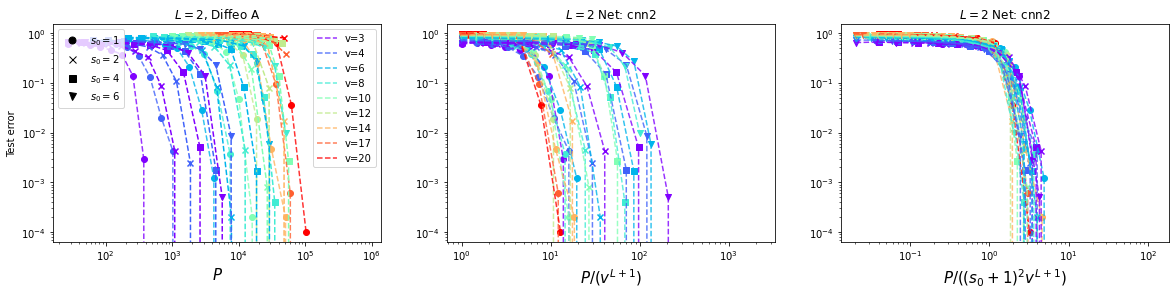

In [3]:
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [1,2,4,6]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if s0>=4:
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==4:
                                    lr = .03
                                elif s0==6 and n==6:
                                    lr = .003
                                elif s0==6 and n!=6:
                                    lr = 0.01
                                
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idxnet==0 and idx_s0==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="v=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2",'cnn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if s0>=4:
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==4:
                                    lr = .03
                                elif s0==6 and n==6:
                                    lr = .003
                                elif s0==6 and n!=6:
                                    lr = 0.01
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                if idxnet==50:
                    xx = xx/((s0**(2))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(s_0^{2} v^{L+1})$",size = 15)
                elif idxnet==0:
                    xx = xx/((n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(v^{L+1})$",size = 15)
                elif idxnet==1:
                    xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)
                elif idxnet==3:
                    xx = xx/((n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(n^{L+1})$",size = 15)
            elif net =='fcn2':
                xx = xx/n**(L+1)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="v=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss.pdf")
plt.savefig("diffeo_L2_A_ss.png", bbox_inches='tight')

In [84]:
ns = ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index


s0s = [1,2,4,6]
L=2

pstars = torch.zeros((len(s0s),len(ns)))

for (idx_s0,s0) in enumerate(s0s):
    print('s0: '+str(s0))
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 1
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if s0>=4:
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==4:
                                    lr = .03
                                elif s0==6 and n==6:
                                    lr = .003
                                elif s0==6 and n!=6:
                                    lr = 0.01
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            print(accs_cnn)
            if len(accs_cnn):
                target_value = 0.1
                closest_index = find_closest_position(accs_cnn, target_value)

                if abs(target_value - accs_cnn[closest_index])<= .1:
                    pstars[idx_s0, idxn] = int(xx[closest_index])
            
torch.save(pstars,'pstars_cnn_l2.pt')          
            

s0: 1
3
[0.5907335907335907, 0.6505791505791507, 0.5637065637065637, 0.5222007722007722, 0.4517374517374517, 0.36969111969111973, 0.13706563706563712, 0.0028957528957529633, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4
[0.6504884004884005, 0.6303418803418803, 0.6043956043956044, 0.5204517704517705, 0.34737484737484736, 0.13034188034188035, 0.019536019536019467, 0.0042735042735043294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
6
[0.7664, 0.7304999999999999, 0.6731, 0.5624, 0.4927, 0.2097, 0.028900000000000006, 0.0012000000000000454, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
8
[0.7951999999999999, 0.7206999999999999, 0.6526, 0.5374, 0.3835, 0.06829999999999999, 0.0037000000000000453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
10
[0.8353, 0.7945, 0.7493000000000001, 0.6653999999999999, 0.425, 0.046500000000000055, 0.00019999999999996022, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
12
[0.8420000000000001, 0.8055, 0.7646999999999999, 0.6421000000000001, 0.35400000000000004, 0.018900000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
14
[0.861

27 18432


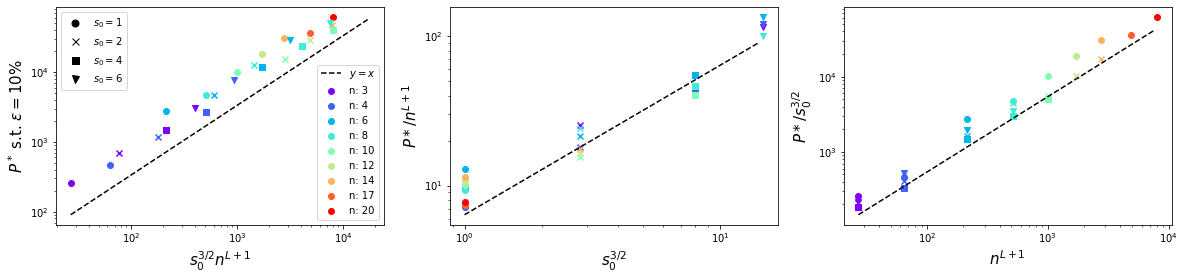

In [41]:
ns = ns = np.array([3,4,6,8,10,12,14,17,20])
s0s = [1,2,4,6]
pstars = torch.load('pstars_cnn_l2.pt')        
L=2
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
fig, axs = plt.subplots(1,3, figsize = (20,4))

vs = []

for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            if idx_s0 ==0:
                axs[0].scatter([s0**(3/2)*n**(L+1)],[pstars[idx_s0, idxn]],label = r'n: %d'%(n),marker = mar,color = col)
            else:
                axs[0].scatter([s0**(3/2)*n**(L+1)],[pstars[idx_s0, idxn]],marker = mar,color = col)
            vs+=[s0**(2)*n**(L+1)]
                
                

min0 = min(vs)
max0 = max(vs)
print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
C = max(pstars.flatten().tolist())/max0
axs[0].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$s_0^{3/2} n^{L+1}$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')   

#################################################################
vs=[]
ps0 =[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[1].scatter([s0**(3/2)],[pstars[idx_s0, idxn]/n**(L+1)],marker = mar,color = col)
            vs+=[s0**(3/2)]
            ps0 += [pstars[idx_s0, idxn]/n**(L+1)]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)
C = 0.7*max(ps0)/max0
axs[1].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[1].set_ylabel(r'$P*/n^{L+1}$',size = 15)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$s_0^{3/2}$',size = 15)

#################################################################
vs= []
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[2].scatter([n**(L+1)],[pstars[idx_s0, idxn]/s0**(3/2)],marker = mar,color = col)
            vs+=[n**(L+1)]
            ps0 += [pstars[idx_s0, idxn]/s0**(3/2)]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)
C = 0.7*max(ps0)/max0
axs[2].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$n^{L+1}$',size = 15)
axs[2].set_ylabel(r'$P*/s_0^{3/2}$',size = 15)

plt.savefig("P_L2_cnn.png", bbox_inches='tight')

1
2
4
6


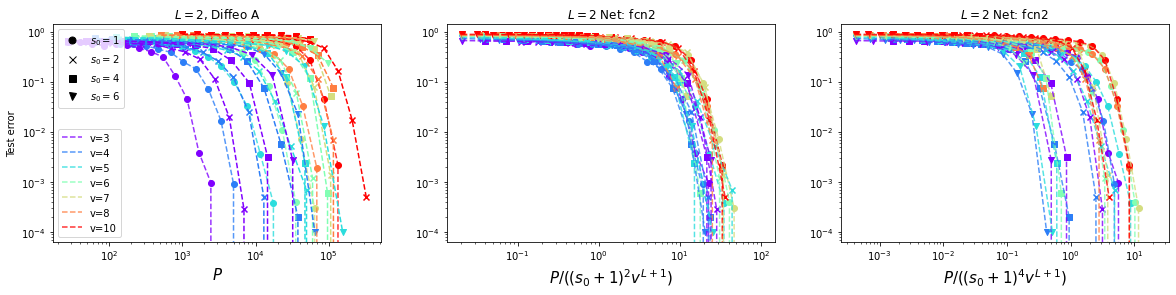

In [3]:
ns = np.array([3,4,5,6,7,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [1,2,4,6]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 1
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            if n==4:
                p_max_used = min(pmax,110000)
            else:
                p_max_used = min(pmax,510000)
            #p_pred = n**(L+1)
            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0==6: lr = 0.003
                            tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idxnet==0 and idx_s0==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="v=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2",'fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 1
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            if n==4:
                p_max_used = min(pmax,110000)
            else:
                p_max_used = min(pmax,510000)
            #p_pred = n**(L+1)
            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)

            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0==6: lr = 0.003
                            tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")


                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='fcn2':
                if idxnet==50:
                    xx = xx/((s0**(2))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(s_0^{2} v^{L+1})$",size = 15)
                elif idxnet==1:
                    xx = xx/(((s0+1)**(4))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{4} v^{L+1})$",size = 15)
                elif idxnet==0:
                    xx = xx/(((s0+1)**(2))*(n**(L+1))) 
                    axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)
                elif idxnet==3:
                    xx = xx/((n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(n^{L+1})$",size = 15)

        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="v=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss_fc.pdf")
plt.savefig("diffeo_L2_A_ss_fc.png", bbox_inches='tight')

In [3]:
ns = np.array([3,4,5,6,7,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index


s0s = [1,2,4,6]
L=2

pstars = torch.zeros((len(s0s),len(ns)))

for (idx_s0,s0) in enumerate(s0s):
    print('s0: '+str(s0))
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 1
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            if n==4:
                p_max_used = min(pmax,110000)
            else:
                p_max_used = min(pmax,510000)
            #p_pred = n**(L+1)
            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0==6: lr = 0.003
                            tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            print(accs_cnn)
            target_value = 0.05
            closest_index = find_closest_position(accs_cnn, target_value)
            
            if abs(target_value - accs_cnn[closest_index])<= .2:
                pstars[idx_s0, idxn] = int(xx[closest_index])
            
torch.save(pstars,'pstars_fc_l2.pt')          
            

s0: 1
3
[0.6235521235521235, 0.61003861003861, 0.5656370656370656, 0.527992277992278, 0.5743243243243243, 0.5482625482625483, 0.46332046332046334, 0.3976833976833977, 0.30984555984555984, 0.13030888030888035, 0.04536679536679543, 0.003861003861003809, 0.0009652509652509877, 0.0]
4
[0.6336996336996337, 0.6459096459096458, 0.5772283272283272, 0.5726495726495727, 0.5241147741147741, 0.4493284493284493, 0.38614163614163616, 0.25030525030525025, 0.1807081807081808, 0.07081807081807084, 0.016788766788766764, 0.0009157509157509481, 0.0, 0.0]
5
[0.658625, 0.636375, 0.62125, 0.59525, 0.54425, 0.49700000000000005, 0.414875, 0.31575000000000003, 0.201875, 0.09912499999999995, 0.032249999999999945, 0.0036249999999999716, 0.00037499999999994314, 0.0]
6
[0.7856000000000001, 0.7495, 0.7362000000000001, 0.6947, 0.6456000000000001, 0.6113000000000001, 0.5282, 0.4621, 0.3868, 0.2708, 0.08269999999999995, 0.010999999999999944, 0.0004000000000000625, 0.0]
7
[0.8118000000000001, 0.7879999999999999, 0.7759,

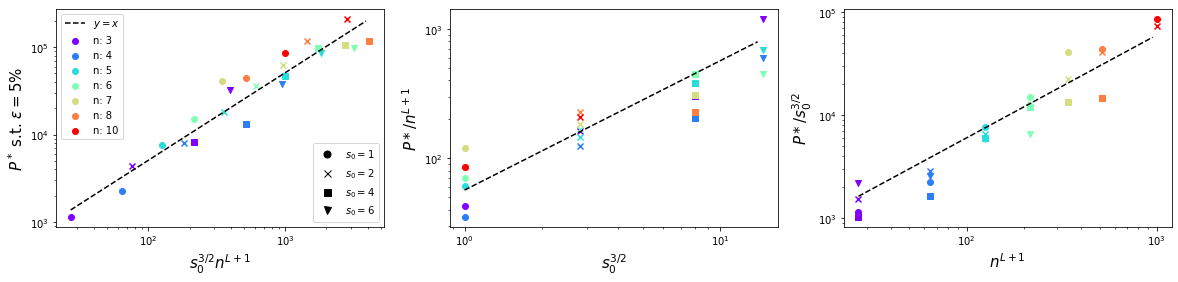

In [48]:
ns = np.array([3,4,5,6,7,8,10])
s0s = [1,2,4,6]
pstars = torch.load('pstars_fc_l2.pt')        
L=2
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
fig, axs = plt.subplots(1,3, figsize = (20,4))

vs=[]
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            if idx_s0 ==0:
                axs[0].scatter([(s0**(3/2))*n**(L+1)],[pstars[idx_s0, idxn]],label = r'n: %d'%(n),marker = mar,color = col)
            else:
                axs[0].scatter([(s0**(3/2))*n**(L+1)],[pstars[idx_s0, idxn]],marker = mar,color = col)
            vs+=[(s0**(3/2))*n**(L+1)]
            ps0 += [pstars[idx_s0, idxn]]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)

C = max(ps0)/max0
axs[0].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')
                
                
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$s_0^{3/2} n^{L+1}$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 5\%$',size = 15)

s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'lower right')   

#################################################################
vs=[]
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[1].scatter([s0**(3/2)],[pstars[idx_s0, idxn]/n**(L+1)],marker = mar,color = col)
        vs+=[s0**(3/2)]
        ps0 += [pstars[idx_s0, idxn]/n**(L+1)]


min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)

C = 0.7*max(ps0)/max0
axs[1].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$s_0^{3/2}$',size = 15)
axs[1].set_ylabel(r'$P*/n^{L+1}$',size = 15)
#################################################################
vs=[]
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[2].scatter([n**(L+1)],[pstars[idx_s0, idxn]/s0**(3/2)],marker = mar,color = col)
        vs+=[n**(L+1)]
        ps0 += [pstars[idx_s0, idxn]/s0**(3/2)]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)
C = 0.7*max(ps0)/max0
axs[2].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$n^{L+1}$',size = 15)
axs[2].set_ylabel(r'$P*/s_0^{3/2}$',size = 15)

plt.savefig("P_L2_fc.png", bbox_inches='tight')

1
2
4
6


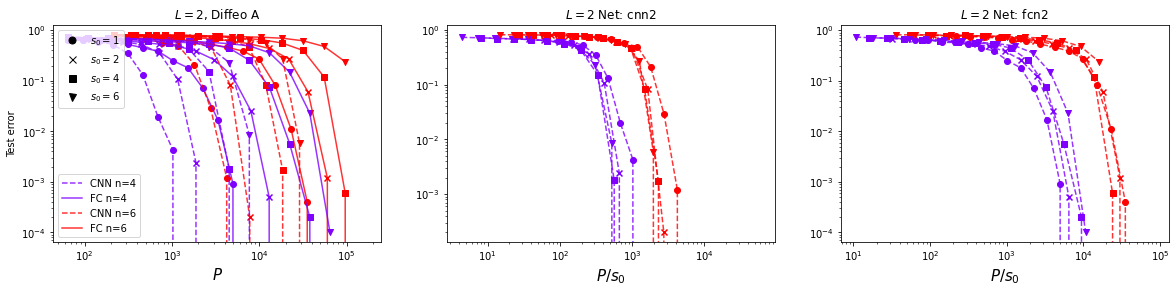

In [35]:
ns = np.array([4,6])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [1,2,4,6]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:

                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idx_s0==0:
                #print(accs_cnn)
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="CNN n=%d" %n,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="FC n=%d" %n,ls="-",color = col, alpha = .8)     
            else:
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="-",color = col, alpha = .8)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2",'fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                if idxnet==0:
                    xx = xx/(s0**(3/2))#*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/s_0$",size = 15)
            elif net =='fcn2':
                xx = xx/(s0**(1))
                axs[idxnet+1].set_xlabel(r"$P/s_0$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss_n_fixed.pdf")
plt.savefig("diffeo_L2_A_ss_n_fixed.png", bbox_inches='tight')

2
4


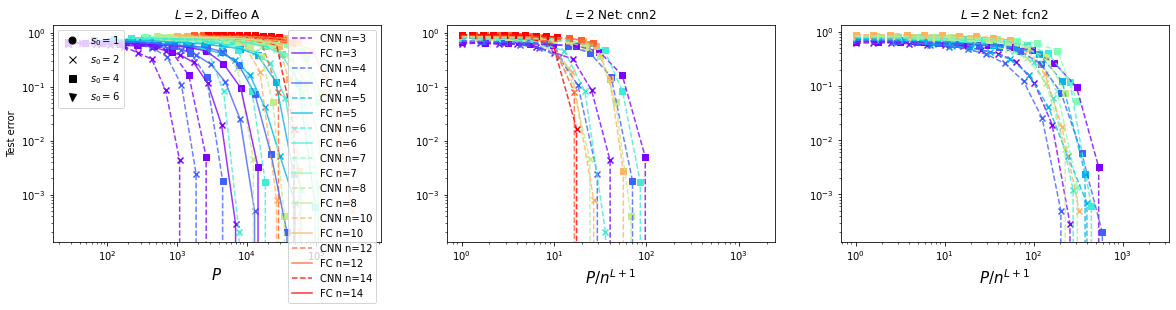

In [8]:
ns = np.array([3,4,5,6,7,8,10,12,14])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [2,4]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:

                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idx_s0==0:
                #print(accs_cnn)
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="CNN n=%d" %n,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="FC n=%d" %n,ls="-",color = col, alpha = .8)     
            else:
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="-",color = col, alpha = .8)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2",'fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                
                xx = xx/(n**(L+1)) #s0**2
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
            elif net =='fcn2':
                xx = xx/(n**(L+1))
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss_s_fixed.pdf")
plt.savefig("diffeo_L2_A_ss_s_fixed.png", bbox_inches='tight')

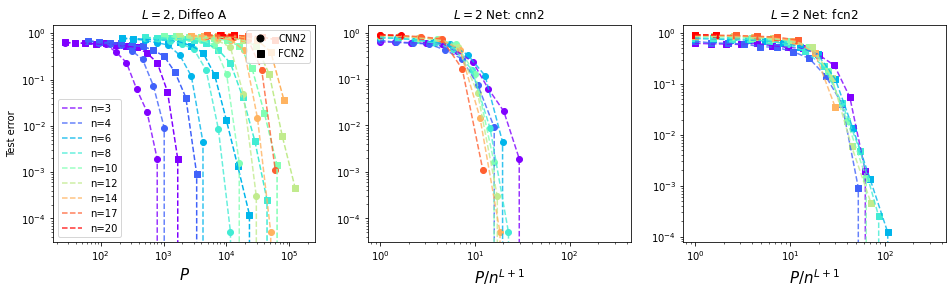

In [12]:
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (16,4))

for L in Ls:
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = (4*n)**(2**L-1)*n
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp = load_file(net+"_data_L2_A/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idxnet==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="hlcn":
                mar = "x"
            elif net =="fcn2":
                mar = "s"
            elif net =="gcnn":
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='CNN2')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='LCN')
    fcn2 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                  markersize=7, label='FCN2')
    gcnn = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                  markersize=7, label='GCNN')
    first_legend = axs[0].legend()
    ax = axs[0].add_artist(first_legend)
    axs[0].legend(handles=[cnn2,fcn2],loc = 'upper right')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = (4*n)**(2**L-1)*n
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp = load_file(net+"_data_L2_A/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                xx = xx/n**(L+1)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
            elif net =='fcn2':
                xx = xx/n**(L+1)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            #axs[idxnet+1].set_xlabel(r"$P/n^{L}$",size = 15)
            #axs[idxnet+1].set_ylabel("Test error")
            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")   
plt.savefig("diffeo_L2_A.pdf")
plt.savefig("diffeo_L2_A.png", bbox_inches='tight')

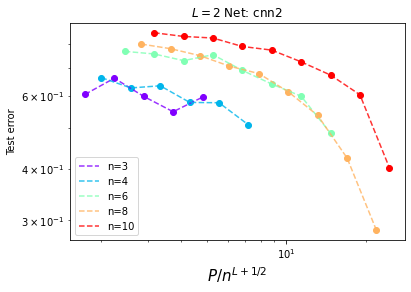

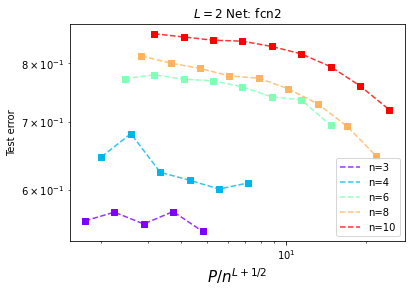

In [20]:
###############################################################
ns = np.array([3,4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        plt.title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        tmp = load_file(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                         pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/n**(L+1/2)
            #if net=="fcn2":
            #    xx =xx/n
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)    
            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+1/2}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
        plt.legend()
        plt.yscale("log")   
        plt.show()

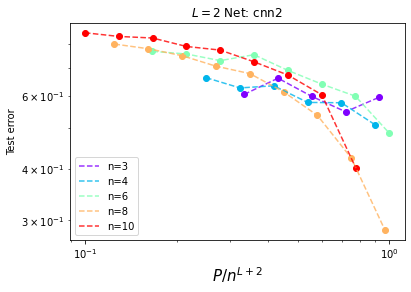

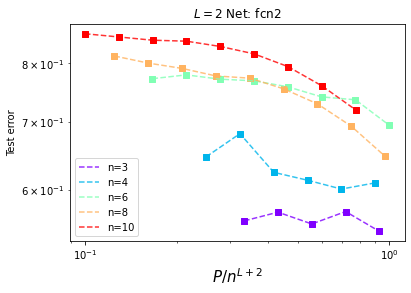

In [21]:
###############################################################
ns = np.array([3,4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        plt.title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                         pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/n**(L+2)
            
            #if net=="fcn2":
            #    xx =xx/n
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+2}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
        plt.legend()
        plt.yscale("log")   
        plt.show()

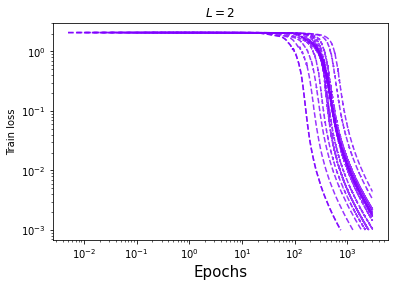

In [10]:
#training loss

ns = np.array([8])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
s0 =6
###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#
for L in Ls:
    plt.title(r"$L= %d$" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.01
                seed = 1
            
            train_loss = []
            epochs = []

            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if s0>=4:
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            xx = xx[:-1]
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    #print(ptr)
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                          
                        train_loss= (tmp["train loss"])
                        epochs = (tmp["epoch"])
                        
                        #print(train_loss)
                        #print(epochs)
                    except:
                        pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''

                if idxnet==0:
                    #print(accs_cnn)
                
                    plt.plot(epochs,train_loss,label="n=%d" %n,ls="--",color = col, alpha = .8)  
                else:
                    plt.plot(epochs,train_loss,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="hlcn":
                mar = "x"
            elif net =="fcn2":
                mar = "s"
            elif net =="gcnn":
                mar = "v"
            
            plt.xlabel(r"Epochs",size = 15)
            plt.ylabel("Train loss")
            plt.xscale("log")
    plt.yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='CNN2')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='LCN')
    fcn2 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                  markersize=7, label='FCN2')
    gcnn = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                  markersize=7, label='GCNN')
    #first_legend = plt.legend()
    #ax = plt.gca().add_artist(first_legend)
    #plt.legend(handles=[cnn2,hlcn,fcn2,gcnn],loc = 'upper right')     
    plt.show()

    
    

3
[0.027638190954773875, 0.05633802816901408, 0.03795379537953792, 0.033333333333333284, 0.005910165484633581, 0.008333333333333286, 0.0, 0.0, 0.0016181229773462747, 0.0]
3
leo: not found at ptr: 81
leo: not found at ptr: 104
leo: not found at ptr: 135
leo: not found at ptr: 174
leo: not found at ptr: 225
leo: not found at ptr: 291
leo: not found at ptr: 375
leo: not found at ptr: 485
leo: not found at ptr: 627
leo: not found at ptr: 809
4
[0.13128639491794603, 0.07286432160804025, 0.03734578192730908, 0.011275167785234857, 0.003040173724212849, 0.0005326704545454675, 0.00014823599169872637, 0.0, 0.0, 0.0]
4
leo: not found at ptr: 256
leo: not found at ptr: 330
leo: not found at ptr: 427
leo: not found at ptr: 551
leo: not found at ptr: 712
leo: not found at ptr: 920
leo: not found at ptr: 1188
leo: not found at ptr: 1534
leo: not found at ptr: 1982
leo: not found at ptr: 2560
8
[0.25920000000000004, 0.12819999999999993, 0.04355000000000004, 0.019749999999999945, 0.0020999999999999374,

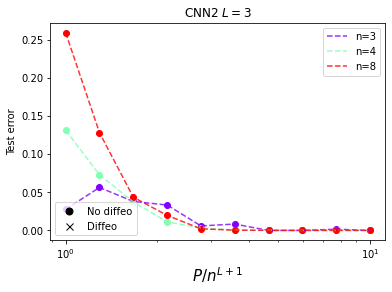

In [51]:
#comparison CNN2 on data with and without diffeo
ns = np.array([3,4,8])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([3])
lr = .1
width = 512
seed = 0
nets =["cnn2","leo"]
for L in Ls:
    plt.title(r"CNN2 $L= %d$" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            print(n)
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        if net == 'cnn2':
                            if n!=6 and n!=10:
                                tmp = load_file("cnn2_data/cnn2_data/hier1_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                tmp = load_file("cnn2_data/cnn2_data/hier1_cnn2_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        else:
                            #print(net+"_data/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp = load_file(net+"_data/hier1_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                        print(net+": not found at ptr: "+str(ptr))
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idxnet==0:
                print(accs_cnn)
                plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                plt.plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="leo":
                mar = "s"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+1}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
    #plt.yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='No diffeo')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='Diffeo')

    
    first_legend = plt.legend()
    ax = plt.gca().add_artist(first_legend)
    plt.legend(handles=[cnn2,hlcn],loc = 'lower left')     
    plt.show()
    

[ 2744.          3544.0122808   4577.26787408  5911.76878945
  7635.34299966  9861.42469348 12736.51975943 16449.84782875
 21245.79545277 27440.         27440.         29848.06047492
 32467.44584965 35316.70142808 38416.        ]
[0.89755, 0.90045, 0.8878, 0.87715, 0.8664499999999999, 0.8410500000000001, 0.8234, 0.80305, 0.7724500000000001, 0.6872, 0.6505, 0.58135, 0.48210000000000003]


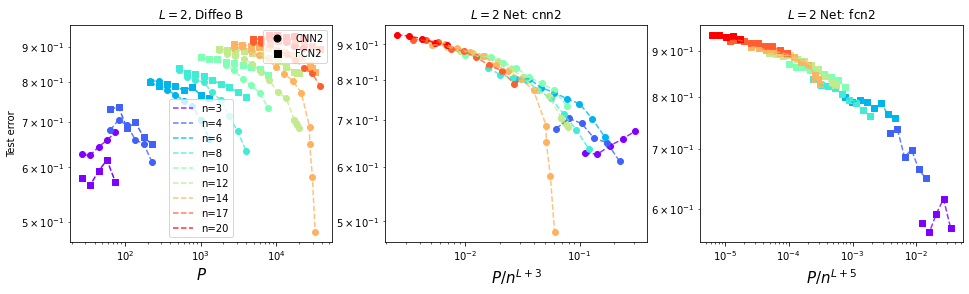

In [9]:
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (16,4))

for L in Ls:
    axs[0].set_title(r"$L= %d$, Diffeo B" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            if n>10:
                xx1 = np.logspace(np.log10(10*p_pred),np.log10(pmax),5)
                xx = np.concatenate((xx,xx1))
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    #print(ptr)
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_B/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                        tmp_num = (100-tmp[choice]["acc"])/100 
                        accs_cnn.append(tmp_num)
                        #print(ptr, tmp_num)
                    except:
                        pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            if idxnet==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="hlcn":
                mar = "x"
            elif net =="fcn2":
                mar = "s"
            elif net =="gcnn":
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 
            
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='CNN2')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='LCN')
    fcn2 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                  markersize=7, label='FCN2')
    gcnn = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                  markersize=7, label='GCNN')
    first_legend = axs[0].legend()
    ax = axs[0].add_artist(first_legend)
    axs[0].legend(handles=[cnn2,fcn2],loc = 'upper right')     
###############################################################
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            if n>10:
                xx1 = np.logspace(np.log10(10*p_pred),np.log10(pmax),5)
                xx = np.concatenate((xx,xx1))
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax))
                #if n>10 and net=='cnn2':
                #    print("ok")
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_B/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                        #if n>10:
                        #    print("n: "+str(n)+" P: "+str(ptr))
                        pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            if net =='cnn2':
                xx = xx/n**(L+3)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+3}$",size = 15)
            elif net =='fcn2':
                xx = xx/n**(L+5)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+5}$",size = 15)
            

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            if n==14 and net=='cnn2':
                print(xx*n**(L+3))
                print(accs_cnn)
            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            
            #axs[idxnet+1].set_ylabel("Test error")
            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")   
plt.savefig("diffeo_L2_B.pdf")
plt.savefig("diffeo_L2_B.png", bbox_inches='tight')

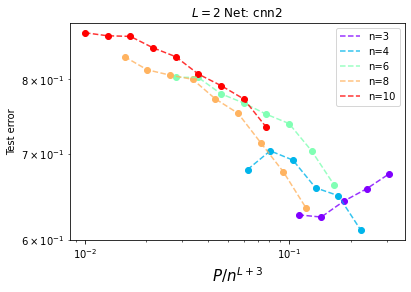

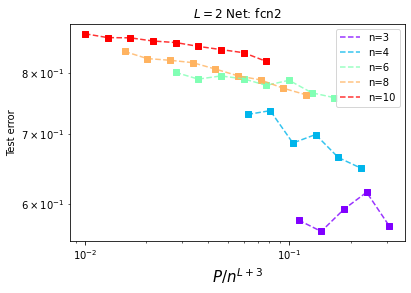

In [35]:
###############################################################
# DIFFEO B

ns = np.array([3,4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        plt.title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_B/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                         pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/n**(L+3)
            

            plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+3}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
        plt.legend()
        plt.yscale("log")   
        plt.show()

More iterations at fixed P: five needed to understand the n=14 case and n=3 case

[  216.           285.63324346   377.71458226   499.48074645
   660.50141507   873.43130322  1155.00470406  1527.35064736
  2019.73203382  2670.84542472  3531.86222888  4670.45029577
  6176.09197405  8167.11658542 10800.        ]
[0.7763, 0.7652, 0.7483, 0.7165, 0.6595, 0.627, 0.5627, 0.4913, 0.31650000000000006, 0.11579999999999999, 0.022399999999999948, 0.0018999999999999772, 0.00019999999999996022, 0.0, 0.0]
[ 216.          330.40669485  505.41011111  773.10594609 1182.58972414
 1808.96093571 2767.09631424 4232.71827553 6474.62247981 9903.97506454]
[0.7707378828068484, 0.748553170966964, 0.7034603327706777, 0.6256329877019532, 0.5588377140101278, 0.3351217747769472, 0.1183385579937304, 0.004400771642150972, 0.0, 0.0]


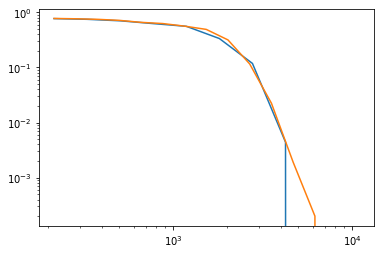

In [26]:
#check for s0 =1

n=6
L=2
net='cnn2'
seed =1
width = 512
lr = 0.1
p_max  = (4*n)**(2**L-1)*n
p_pred = n**(L+1)
#print("pmax"+str(pmax))
xx= np.logspace(np.log10(p_pred),np.log10(50*p_pred),15)
print(xx)

acc0 = []    
acc1 = []
choice = 'best'
for ptrc in xx:
    ptr = int(ptrc)
    ptr = min(ptr,p_max)
    tmp = load_file("check/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_1_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    t1 = (100-tmp[choice]["acc"])/100
    acc1.append(t1)
print(acc1)
xx3= np.logspace(np.log10(p_pred),np.log10(p_max),15)  
xx0 =xx3[xx3<11000]
print(xx0)

for ptrc in xx0:
    ptr = int(ptrc)
    ptr = min(ptr,p_max)
    tmp = load_file("cnn2_data_L2_A/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    t0 = (100-tmp[choice]["acc"])/100
    acc0.append(t0)    
print(acc0)
plt.plot(xx0,acc0)
plt.plot(xx,acc1)

plt.xscale('log')
plt.yscale('log')